# Sentiment Analysis Project

## 1. Data Loading and Exploration 


In [7]:
import pandas as pd

# Load the data with the correct encoding
data = pd.read_csv(r"C:\Users\Admin\Desktop\analytics\AI\amazon.csv")

# Display the first few rows of the dataframe
data.head()

,Text,label
0,This is the best apps acording to a bunch of ...,1
1,This is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


## 2. Data Cleaning

In [8]:
# Check for missing values
data.isnull().sum()

# Display data types and basic statistics
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    19996 non-null  object
 1   label   19996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


,label
count,19996.000000
mean,0.761652
std,0.426083
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


## 3. Handling Missing Values

In [9]:
# Fill missing values or drop rows/columns as necessary
# Example: fill missing values with the mean or drop missing values
data = data.dropna()  # or data.fillna(data.mean(), inplace=True)

# Verify if all missing values are handled
data.isnull().sum()

Text     0
label    0
dtype: int64

## 4. Data Preprocessing for ANN, CNN, and RNN

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example column names: 'text' for text data and 'label' for sentiment
Texts = data['Text'].values
label = data['label'].values

# Encode labels
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(label)

# Tokenize text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(Text)
X = tokenizer.texts_to_sequences(Text)
X = pad_sequences(X, maxlen=100)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=42)

## 5. Model Building and Training

### ANN

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

# ANN model
ann_model = Sequential()
ann_model.add(Embedding(input_dim=5000, output_dim=32, input_length=100))
ann_model.add(Flatten())
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8048 - loss: 0.4272 - val_accuracy: 0.8932 - val_loss: 0.2537
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9469 - loss: 0.1450 - val_accuracy: 0.8932 - val_loss: 0.2748
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9887 - loss: 0.0405 - val_accuracy: 0.8898 - val_loss: 0.3552
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9988 - loss: 0.0082 - val_accuracy: 0.8903 - val_loss: 0.4624
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.8913 - val_loss: 0.5153


### CNN

In [34]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

# CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=5000, output_dim=32, input_length=100))
cnn_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8158 - loss: 0.4103 - val_accuracy: 0.9030 - val_loss: 0.2303
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9393 - loss: 0.1578 - val_accuracy: 0.9065 - val_loss: 0.2345
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9656 - loss: 0.0990 - val_accuracy: 0.9045 - val_loss: 0.2742
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9871 - loss: 0.0476 - val_accuracy: 0.8882 - val_loss: 0.3632
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9955 - loss: 0.0204 - val_accuracy: 0.9005 - val_loss: 0.4855


### RNN

In [35]:
from tensorflow.keras.layers import LSTM

# RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=5000, output_dim=32, input_length=100))
rnn_model.add(LSTM(100))
rnn_model.add(Dense(128, activation='relu'))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
rnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 32s 57ms/step - accuracy: 0.8106 - loss: 0.4369 - val_accuracy: 0.8855 - val_loss: 0.2588
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.9237 - loss: 0.1942 - val_accuracy: 0.8898 - val_loss: 0.2531
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.9445 - loss: 0.1497 - val_accuracy: 0.9005 - val_loss: 0.2493
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 28s 57ms/step - accuracy: 0.9576 - loss: 0.1213 - val_accuracy: 0.8967 - val_loss: 0.2952
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.9717 - loss: 0.0805 - val_accuracy: 0.9022 - val_loss: 0.2990


## 6. Model Evaluation

In [37]:
# Evaluate ANN model
ann_loss, ann_acc = ann_model.evaluate(X_test, y_test)
print(f'ANN Model - Loss: {ann_loss}, Accuracy: {ann_acc}')

# Evaluate CNN model
cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test)
print(f'CNN Model - Loss: {cnn_loss}, Accuracy: {cnn_acc}')

# Evaluate RNN model
rnn_loss, rnn_acc = rnn_model.evaluate(X_test, y_test)
print(f'RNN Model - Loss: {rnn_loss}, Accuracy: {rnn_acc}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8883 - loss: 0.5273
ANN Model - Loss: 0.5439159870147705, Accuracy: 0.8849999904632568
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9025 - loss: 0.4743
CNN Model - Loss: 0.48549795150756836, Accuracy: 0.9004999995231628
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9005 - loss: 0.2942
RNN Model - Loss: 0.2989721894264221, Accuracy: 0.9022499918937683


## 7. Importing necessary libraries

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns


## 8. Modify model training to store history

In [40]:
# Train the ANN model
ann_history = ann_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Train the RNN model
rnn_history = rnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 4.7125e-04 - val_accuracy: 0.8938 - val_loss: 0.5397
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9999 - loss: 4.0204e-04 - val_accuracy: 0.8920 - val_loss: 0.5633
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 1.9279e-04 - val_accuracy: 0.8913 - val_loss: 0.5887
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.0000 - loss: 1.1109e-04 - val_accuracy: 0.8900 - val_loss: 0.6026
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 9.4021e-05 - val_accuracy: 0.8915 - val_loss: 0.6195
Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 31s 62ms/step - accuracy: 0.9771 - loss: 0.0646 - val_accuracy: 0.8923 - val_loss: 0.3862
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - accuracy: 0.9829 - loss: 0.0541 - val_accuracy: 0.8985 - val_loss: 0.4036
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step - accuracy: 0.9873 - loss: 0.0362 

In [41]:
# Train the CNN model
cnn_history = cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9988 - loss: 0.0068 - val_accuracy: 0.8945 - val_loss: 0.5026
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9997 - loss: 0.0023 - val_accuracy: 0.8980 - val_loss: 0.6066
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.9015 - val_loss: 0.6302
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9999 - loss: 4.1186e-04 - val_accuracy: 0.8972 - val_loss: 0.6543
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 4.2741e-04 - val_accuracy: 0.9010 - val_loss: 0.7027


## 9. Plotting the training history

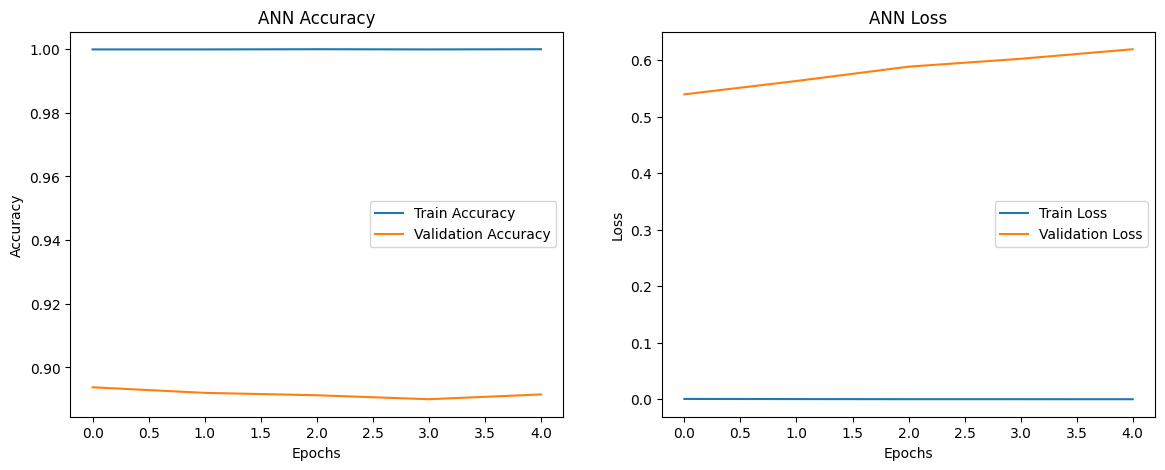

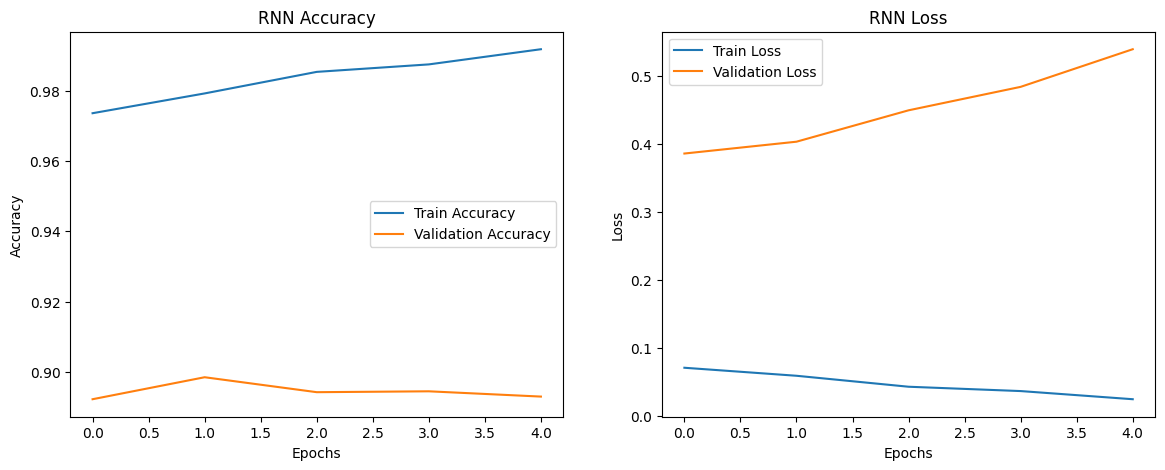

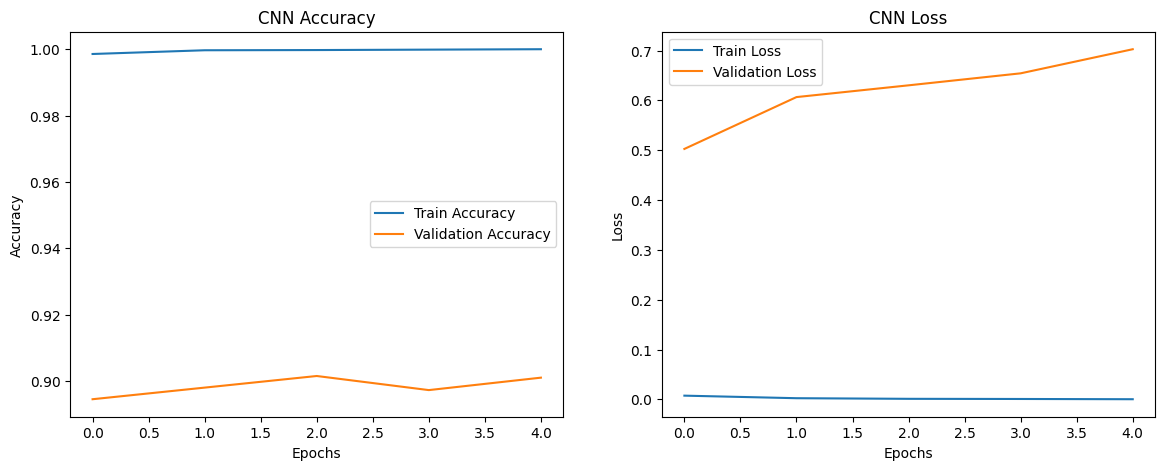

In [42]:
# Plotting function
def plot_history(history, model_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title(f'{model_name} Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    # Plot loss
    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title(f'{model_name} Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.show()

# Plotting ANN history
plot_history(ann_history, 'ANN')

# Plotting RNN history
plot_history(rnn_history, 'RNN')

# Plotting CNN history
plot_history(cnn_history, 'CNN')


## 10. Confusion Matrix

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


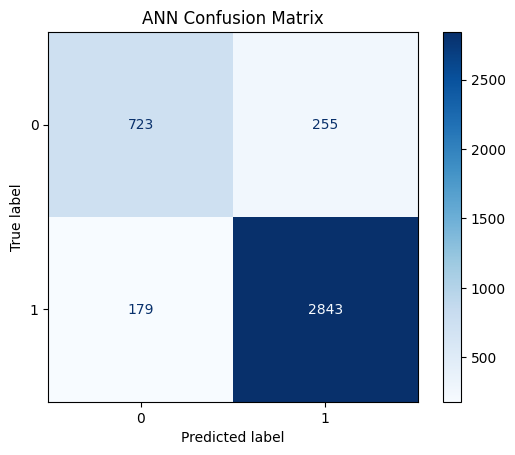

125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


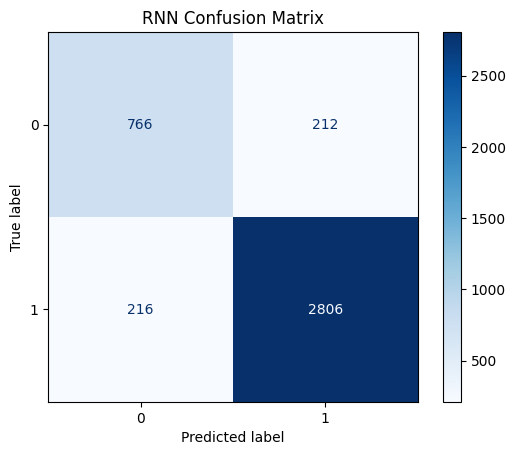

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


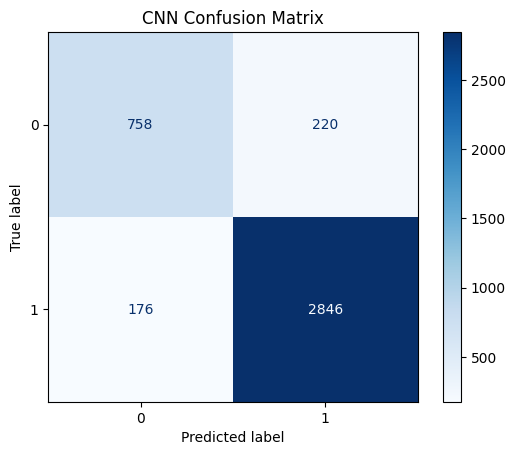

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

plot_confusion_matrix(ann_model, X_test, y_test, 'ANN')
plot_confusion_matrix(rnn_model, X_test, y_test, 'RNN')
plot_confusion_matrix(cnn_model, X_test, y_test, 'CNN')


## 11. ROC Curve

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


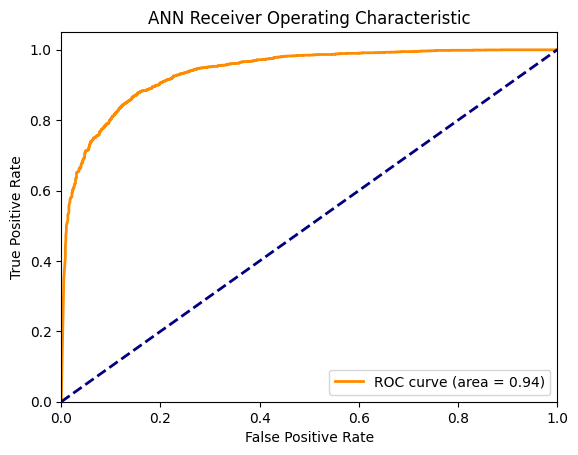

125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


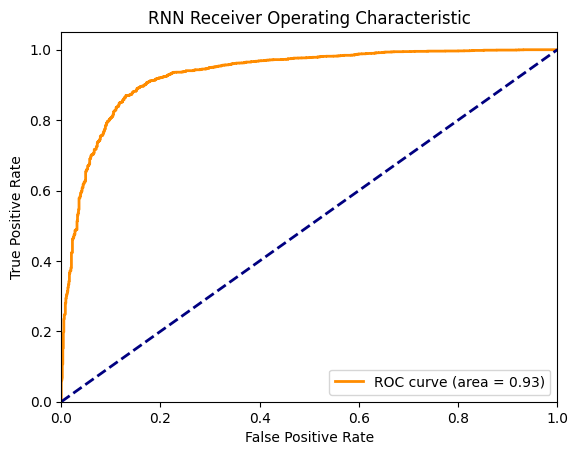

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


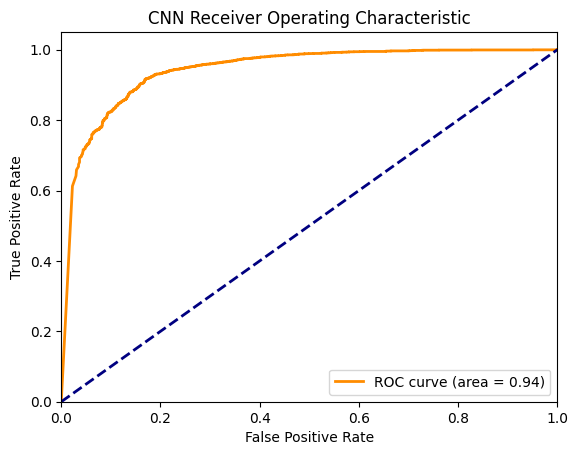

In [44]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_prob = model.predict(X_test).ravel()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(ann_model, X_test, y_test, 'ANN')
plot_roc_curve(rnn_model, X_test, y_test, 'RNN')
plot_roc_curve(cnn_model, X_test, y_test, 'CNN')


## 12. Precision-Recall Curve

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


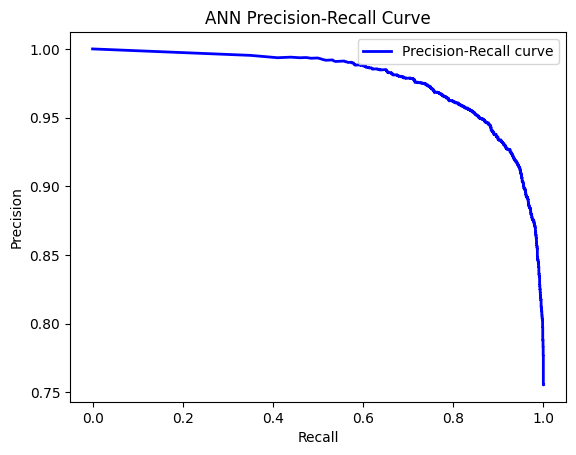

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


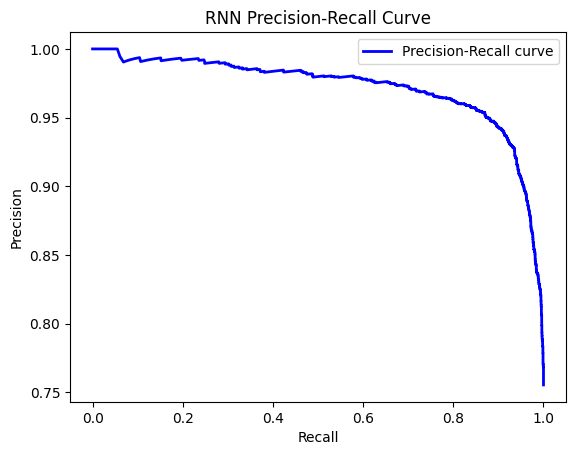

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


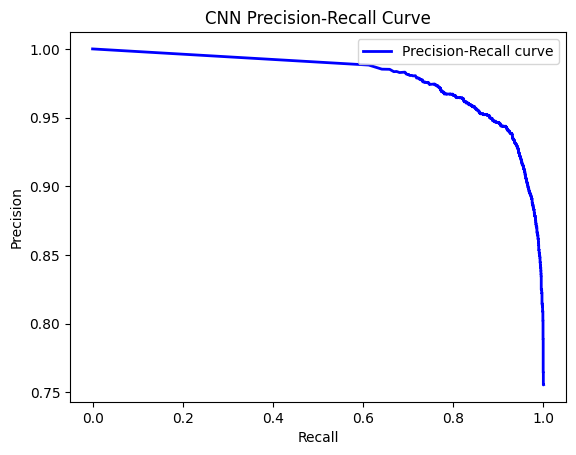

In [45]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(model, X_test, y_test, model_name):
    y_pred_prob = model.predict(X_test).ravel()
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    plt.figure()
    plt.plot(recall, precision, lw=2, color='b', label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} Precision-Recall Curve')
    plt.legend(loc="upper right")
    plt.show()

plot_precision_recall_curve(ann_model, X_test, y_test, 'ANN')
plot_precision_recall_curve(rnn_model, X_test, y_test, 'RNN')
plot_precision_recall_curve(cnn_model, X_test, y_test, 'CNN')


In [48]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --------------------------- ------------ 204.8/300.2 kB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


## 13. Word Cloud

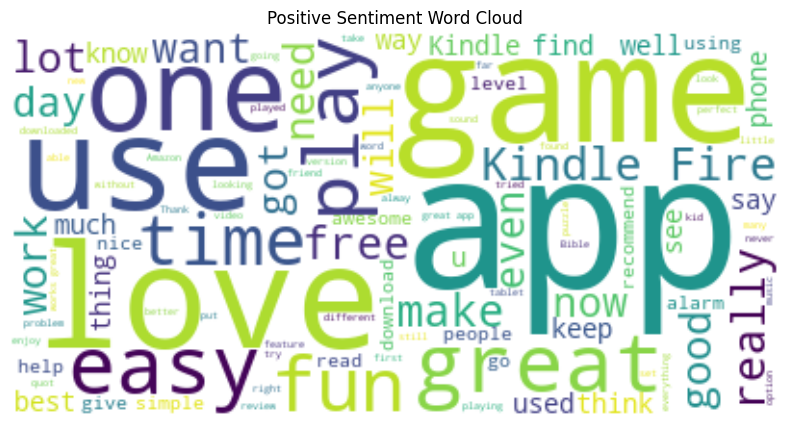

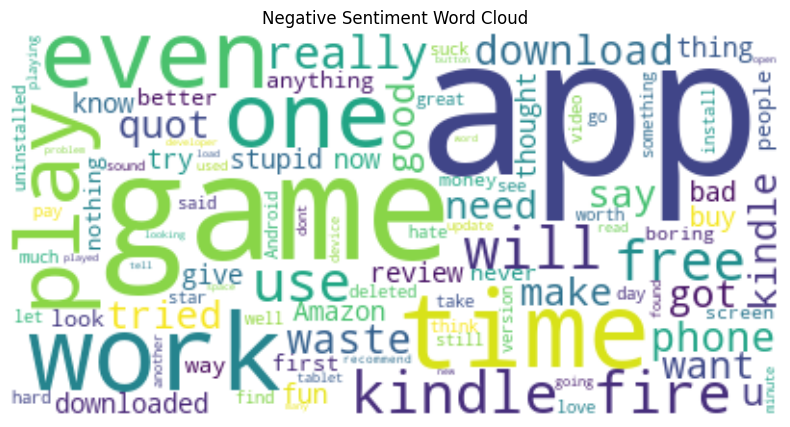

In [53]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_word_cloud(data, label, title):
    text = " ".join(review for review in data[data['label'] == label]['Text'])
    wordcloud = WordCloud(max_words=100, background_color="white").generate(str(text))  # Convert to string
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

plot_word_cloud(data, 1, "Positive Sentiment Word Cloud")
plot_word_cloud(data, 0, "Negative Sentiment Word Cloud")

## 14. Distribution of Predictions

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


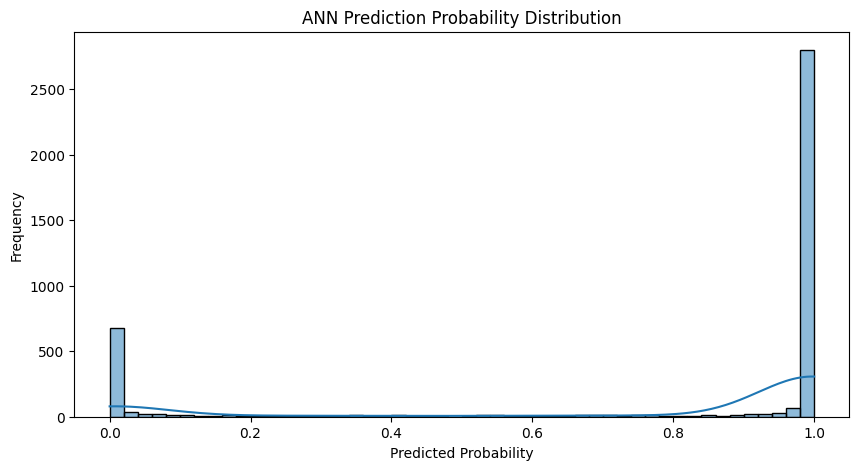

125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


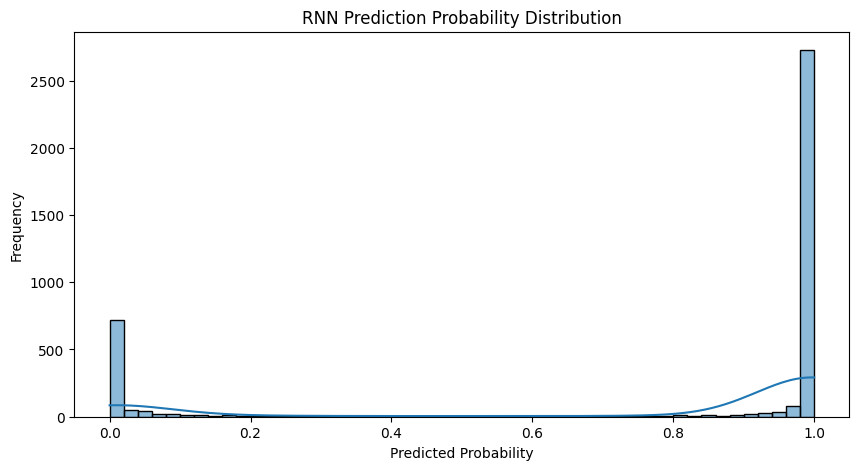

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


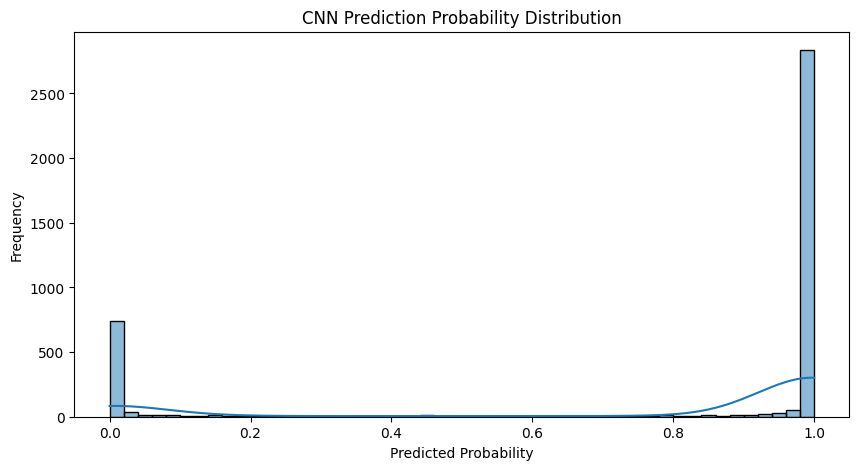

In [47]:
def plot_prediction_distribution(model, X_test, model_name):
    y_pred_prob = model.predict(X_test).ravel()
    
    plt.figure(figsize=(10, 5))
    sns.histplot(y_pred_prob, bins=50, kde=True)
    plt.title(f'{model_name} Prediction Probability Distribution')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.show()

plot_prediction_distribution(ann_model, X_test, 'ANN')
plot_prediction_distribution(rnn_model, X_test, 'RNN')
plot_prediction_distribution(cnn_model, X_test, 'CNN')


## Summary.

In [ ]:
In summary, the project involves:

1.Importing necessary libraries.
2.Loading and exploring the data.
3.Cleaning the data by handling missing values.
4.Preprocessing the data by encoding labels, tokenizing text, and splitting the dataset.
5.Building and training ANN, RNN, and CNN models.
6.Evaluating the models and printing their accuracy and loss.
7.Visualizing the results using confusion matrices, ROC curves, Precision-Recall curves, word clouds, and prediction distributions.
These steps will help us build a comprehensive sentiment analysis project with thorough evaluation and visualization of the models' performance.